# ARMA Models in StatsModels - Lab 

## Introduction

In this lesson, you'll fit an ARMA model using `statsmodels` to a real-world dataset. 


## Objectives

In this lab you will: 

- Decide the optimal parameters for an ARMA model by plotting ACF and PACF and interpreting them 
- Fit an ARMA model using StatsModels 

## Dataset

Run the cell below to import the dataset containing the historical running times for the men's 400m in the Olympic games.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning

warnings.simplefilter("ignore", ConvergenceWarning)

data = pd.read_csv("winning_400m.csv")
data["year"] = pd.to_datetime(data["year"].astype(str))
data.set_index("year", inplace=True)
data.index = data.index.to_period("Y")

In [2]:
# Preview the dataset
data.head()

,winning_times
year,
1900,49.4
1904,49.2
1908,50.0
1912,48.2
1920,49.6


Plot this time series data. 

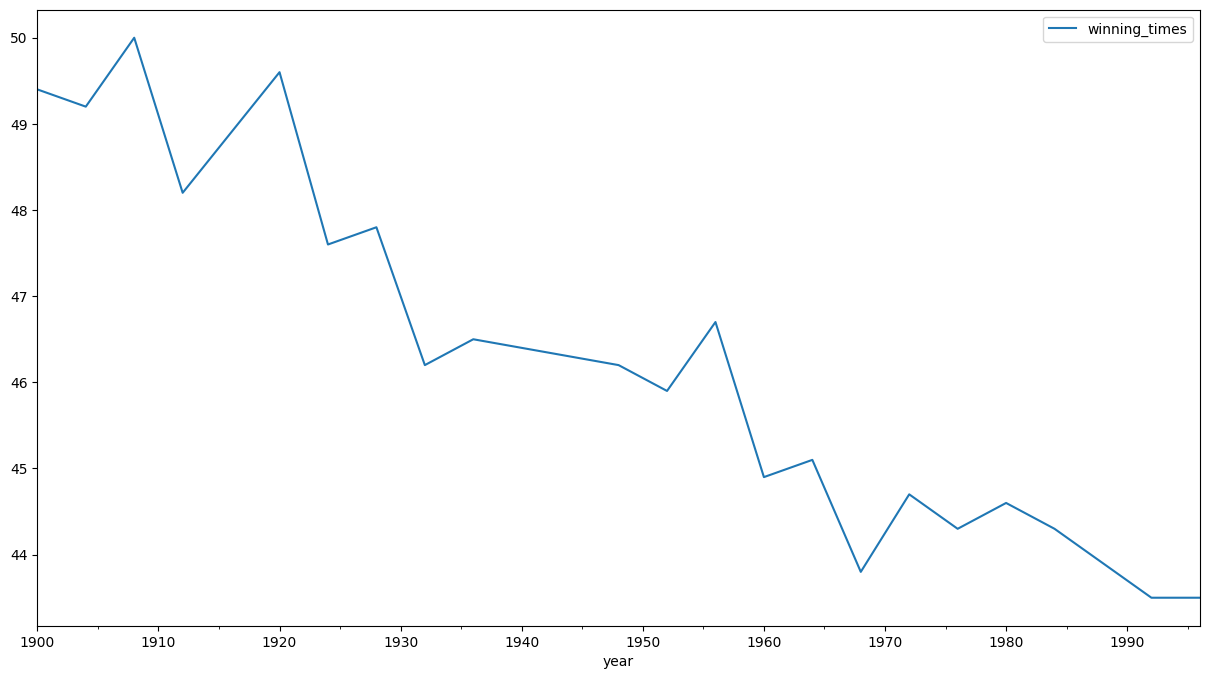

In [3]:
# Plot the time series
data.plot(figsize=(15,8));

If you plotted the time series correctly, you should notice that it is not stationary. So, difference the data to get a stationary time series. Make sure to remove the missing values.

In [4]:
# Difference the time series
data_diff = data.diff(periods=1).dropna()
data_diff

,winning_times
year,
1904,-0.2
1908,0.8
1912,-1.8
1920,1.4
1924,-2.0
1928,0.2
1932,-1.6
1936,0.3
1948,-0.3


Use `statsmodels` to plot the ACF and PACF of this differenced time series. 

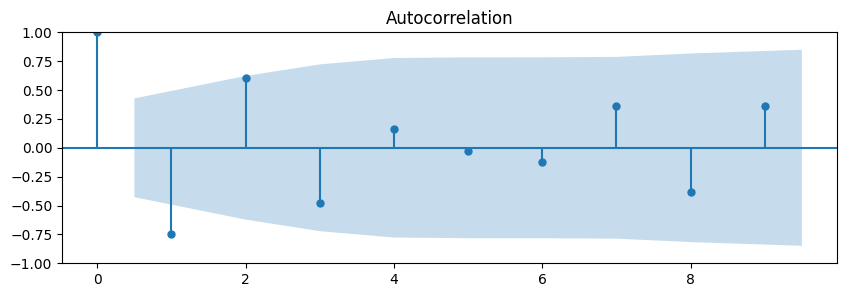

In [5]:
# Plot the ACF
from statsmodels.graphics.tsaplots import plot_acf


fig,ax= plt.subplots( figsize=(10,3))
plot_acf(data_diff, ax=ax, lags=9)
plt.show()



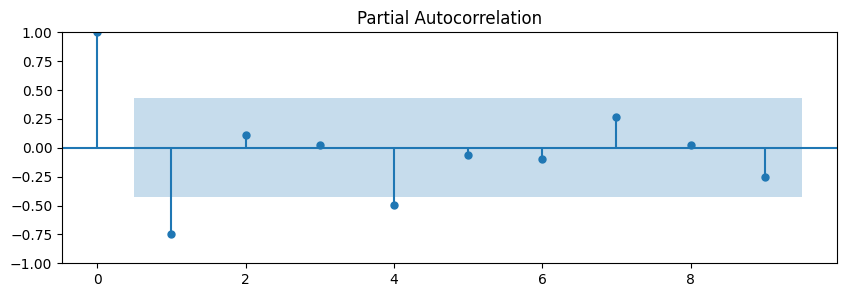

In [6]:
# Plot the PACF
from statsmodels.graphics.tsaplots import plot_pacf

fig,ax= plt.subplots( figsize=(10,3))
plot_pacf(data_diff, ax=ax, method="ywm", lags=9)
plt.show()


Based on the ACF and PACF, fit an ARMA model with the right orders for AR and MA. Feel free to try different models and compare AIC and BIC values, as well as significance values for the parameter estimates. 

In [7]:
from statsmodels.tsa.arima.model import ARIMA

mod_arima= ARIMA(data_diff, order=(1,0,0))
res_arma1= mod_arima.fit()

res_arma1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          winning_times   No. Observations:                   21
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 -20.054
Date:                Fri, 28 Jun 2024   AIC                             46.107
Time:                        11:21:58   BIC                             49.241
Sample:                    12-31-1904   HQIC                            46.787
                         - 12-31-1996                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2885      0.081     -3.559      0.000      -0.447      -0.130
ar.L1         -0.7186      0.144     -5.005      0.000      -1.000      -0.437
sigma2         0.3819      0.180      2.121      0.034       0.029       0.735
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 1.19
Prob(Q):                              0.84   Prob(JB):                         0.55
Heteroskedasticity (H):               0.33   Skew:                             0.20
Prob(H) (two-sided):                  0.16   Kurtosis:                         1.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [8]:
res_arma1.params

const    -0.288462
ar.L1    -0.718618
sigma2    0.381892
dtype: float64

In [9]:
# Fit an ARMA(2,1) model
mod_arma = ARIMA(data_diff, order=(2, 0, 1))
res_arma2 = mod_arma.fit()

# Print out summary information on the fit
res_arma2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          winning_times   No. Observations:                   21
Model:                 ARIMA(2, 0, 1)   Log Likelihood                 -19.931
Date:                Fri, 28 Jun 2024   AIC                             49.862
Time:                        11:21:58   BIC                             55.084
Sample:                    12-31-1904   HQIC                            50.995
                         - 12-31-1996                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2834      0.092     -3.079      0.002      -0.464      -0.103
ar.L1         -0.6102      2.583     -0.236      0.813      -5.673       4.453
ar.L2          0.1280      1.848      0.069      0.945      -3.493       3.749
ma.L1         -0.0208      2.564     -0.008      0.994      -5.046       5.004
sigma2         0.3774      0.181      2.088      0.037       0.023       0.732
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 1.21
Prob(Q):                              0.83   Prob(JB):                         0.55
Heteroskedasticity (H):               0.31   Skew:                             0.22
Prob(H) (two-sided):                  0.14   Kurtosis:                         1.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [10]:
res_arma2.params

const    -0.283442
ar.L1    -0.610170
ar.L2     0.127982
ma.L1    -0.020831
sigma2    0.377369
dtype: float64

In [11]:
# Fit an ARMA(1,2) model
mod_arma = ARIMA(data_diff, order=(1, 0, 2))
res_arma3 = mod_arma.fit()

# Print out summary information on the fit
res_arma3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          winning_times   No. Observations:                   21
Model:                 ARIMA(1, 0, 2)   Log Likelihood                 -19.076
Date:                Fri, 28 Jun 2024   AIC                             48.152
Time:                        11:21:59   BIC                             53.374
Sample:                    12-31-1904   HQIC                            49.285
                         - 12-31-1996                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2784      0.154     -1.811      0.070      -0.580       0.023
ar.L1         -0.4716      0.256     -1.842      0.065      -0.973       0.030
ma.L1         -0.0097      0.267     -0.036      0.971      -0.533       0.514
ma.L2          0.8468      0.536      1.579      0.114      -0.204       1.898
sigma2         0.3110      0.150      2.077      0.038       0.018       0.604
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                 0.68
Prob(Q):                              0.78   Prob(JB):                         0.71
Heteroskedasticity (H):               0.66   Skew:                             0.26
Prob(H) (two-sided):                  0.59   Kurtosis:                         2.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [12]:
res_arma3.params

const    -0.278387
ar.L1    -0.471635
ma.L1    -0.009662
ma.L2     0.846792
sigma2    0.311012
dtype: float64

In [13]:
# Fit an ARMA(2,2) model
mod_arma = ARIMA(data_diff, order=(2, 0, 2))
res_arma4 = mod_arma.fit()

# Print out summary information on the fit
res_arma4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          winning_times   No. Observations:                   21
Model:                 ARIMA(2, 0, 2)   Log Likelihood                 -16.472
Date:                Fri, 28 Jun 2024   AIC                             44.943
Time:                        11:21:59   BIC                             51.210
Sample:                    12-31-1904   HQIC                            46.303
                         - 12-31-1996                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2717      0.103     -2.629      0.009      -0.474      -0.069
ar.L1         -1.7573      0.117    -14.991      0.000      -1.987      -1.528
ar.L2         -0.9179      0.120     -7.664      0.000      -1.153      -0.683
ma.L1          1.5669     50.158      0.031      0.975     -96.741      99.875
ma.L2          0.9986     63.914      0.016      0.988    -124.270     126.268
sigma2         0.2126     13.545      0.016      0.987     -26.336      26.761
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                 0.87
Prob(Q):                              0.86   Prob(JB):                         0.65
Heteroskedasticity (H):               0.41   Skew:                            -0.30
Prob(H) (two-sided):                  0.26   Kurtosis:                         2.20
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [14]:
res_arma4.params

const    -0.271726
ar.L1    -1.757267
ar.L2    -0.917947
ma.L1     1.566943
ma.L2     0.998602
sigma2    0.212598
dtype: float64

In [15]:
model_list=[res_arma1,res_arma2,res_arma3,res_arma4]

In [16]:
for i, model in enumerate(model_list):
    print(f" Model",i+1 ," AIC:", model.aic)
    print(f" Model",i+1 ," BIC:", model.bic)    

 Model 1  AIC: 46.10733707941737
 Model 1  BIC: 49.24090439258764
 Model 2  AIC: 49.86177363767185
 Model 2  BIC: 55.084385826288965
 Model 3  AIC: 48.15170636030123
 Model 3  BIC: 53.374318548918346
 Model 4  AIC: 44.943088545503485
 Model 4  BIC: 51.21022317184402


In [17]:
import pandas as pd

# Create a list to store the results
results = []

# Iterate through the model list and extract AIC and BIC
for i, model in enumerate(model_list):
    results.append({
        "Model": f"Model {i+1}",
        "AIC": model.aic,
        "BIC": model.bic
    })

# Create a DataFrame from the results list
results_df = pd.DataFrame(results)

# Print the table
results_df


,Model,AIC,BIC
0,Model 1,46.107337,49.240904
1,Model 2,49.861774,55.084386
2,Model 3,48.151706,53.374319
3,Model 4,44.943089,51.210223


## What is your final model? Why did you pick this model?

# Your comments here


I would pick the first model. This is because we are trying to achieve a low AIC and BIC value since penalties are applied to avoid overfitting. it qwould have the following order(1,0)

## Summary 

Well done. In addition to manipulating and visualizing time series data, you now know how to create a stationary time series and fit ARMA models. 